In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from parseit.data import load_pickle
import pandas as pd

pd.options.display.min_rows = 100
#pd.options.display.max_rows = set larger than dataset
pd.options.display.max_columns = 20
%matplotlib inline
mpl.rcParams["figure.figsize"] = 15,8

pickle_df = load_pickle("comments.p")
#pickle_df = load_pickle("okt-5-10728c.p")
#pickle_df = load_pickle("okt-5-43896c.p")
#pickle_df = load_pickle("okt-11-4788c.p")

In [2]:
# Make a copy to work from original
df_a = pickle_df.copy()

# remove noise
df_a = df_a[df_a["body"] != "[removed]"]
df_a = df_a.reset_index()

from modules.word_stats import WordStats
df_a = WordStats.score(df_a) # "words_count", "stop_words_count", "bad_words_count", "bad_words" 

# benfords law
# https://www.youtube.com/watch?v=etx0k1nLn78

Number of comments: 624, number of words: 51123


<AxesSubplot:xlabel='index', ylabel='word_count'>

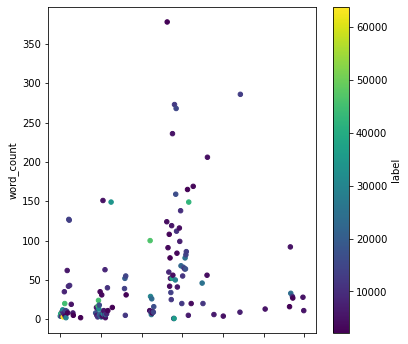

In [67]:
df = df_a.copy()


word_count_df = df[["word_count", "stop_word_count", "bad_word_count"]]
sum_df = word_count_df.sum()
all_words = sum(sum_df)
print(f"Number of comments: {len(df)}, number of words: {all_words}")

# Pie chart and bar chart of word counts
#pd.DataFrame({"all_words": sum_df}).plot.pie(y="all_words", figsize=(5, 5))
#sum_df.plot.bar(y="all_words", figsize=(5, 5))

# Line diagram of word counts
#df.drop(["index", "label"], axis="columns").plot(figsize=(7,5))

# Scores descending
#df[["label"]].sort_values("label", ascending=False).reset_index().drop("index", axis=1).plot.line(figsize=(7,5))


# Scatter plots - scores in relation to counts
#df_sorted = df.sort_values("label", ascending=False).reset_index()
#pd.DataFrame({"word_count": df_sorted.word_count, "label": df_sorted.label}).plot.scatter(x='word_count', y='label', figsize=(5,5))

# these works good
#df.plot.scatter(x='word_count', y='label', figsize=(5,5))
#df.plot.scatter(x='bad_word_count', y='label', figsize=(5,5))
#df.plot.scatter(x='stop_word_count', y='label', figsize=(5,5))
df[df.label > 2000].plot.scatter(x='index', y='word_count', c="label", figsize=(6,6), colormap='viridis')
#display(len(df[df.label > 100]))


#pd.DataFrame([sum_word_count, sum_stop_word_count, sum_bad_word_count], columns=["all_words", "stop_words", "bad_words"]).plot.pie()